In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import master dataframe
master_cleaned_df = pd.read_csv('master_cleaned.csv')
master_cleaned_df

,original_title,year,genres,numvotes,averagerating,production_budget,domestic_gross,worldwide_gross
0,The Legend of Hercules,2014,"Action,Adventure,Fantasy",50352,4.2,70000000,18848538,58953319
1,Baggage Claim,2013,Comedy,8296,5.1,8500000,21569509,22885836
2,Moneyball,2011,"Biography,Drama,Sport",326657,7.6,50000000,75605492,111300835
3,Hereafter,2010,"Drama,Fantasy,Romance",87288,6.5,50000000,32746941,108660270
4,21 Jump Street,2012,"Action,Comedy,Crime",477771,7.2,42000000,138447667,202812429
...,...,...,...,...,...,...,...,...
2061,12 Rounds,2017,"Action,Drama,Romance",11,8.1,20000000,12234694,17306648
2062,Fantasia,2014,Drama,44,5.5,2280000,83320000,83320000
2063,Edmond,2018,"Comedy,Drama,History",705,7.5,10000000,131719,241719
2064,Teefa in Trouble,2018,"Action,Comedy,Crime",2724,7.4,1500000,0,98806


In [3]:
'''
Q1: Which movie genre is most successfull?
'''
'''
1.1.1. First, we split the genre for each movie title.
'''
genre_split_df = master_cleaned_df.assign(genres = master_cleaned_df['genres'].str.split(',')).explode('genres')

'''
1.1.2. Next, we create a smaller dataframe by grouping the genres and sum the movie title.
'''
genre_df = (pd.DataFrame(genre_split_df.groupby('genres', as_index = False).original_title.nunique())).sort_values(
    by = 'original_title', ascending = False).reset_index(drop = True)

'''
1.1.3 We can also check the year range from the master_cleaned_df
'''
print(max(master_cleaned_df.year), min(master_cleaned_df.year))

genre_df

2019 2010


,genres,original_title
0,Drama,1031
1,Comedy,622
2,Action,517
3,Adventure,398
4,Thriller,360
5,Crime,286
6,Horror,264
7,Romance,246
8,Biography,168
9,Sci-Fi,166


Text(0.0, 1.0, 'Genres belonging to movies made from 2010 - 2019')

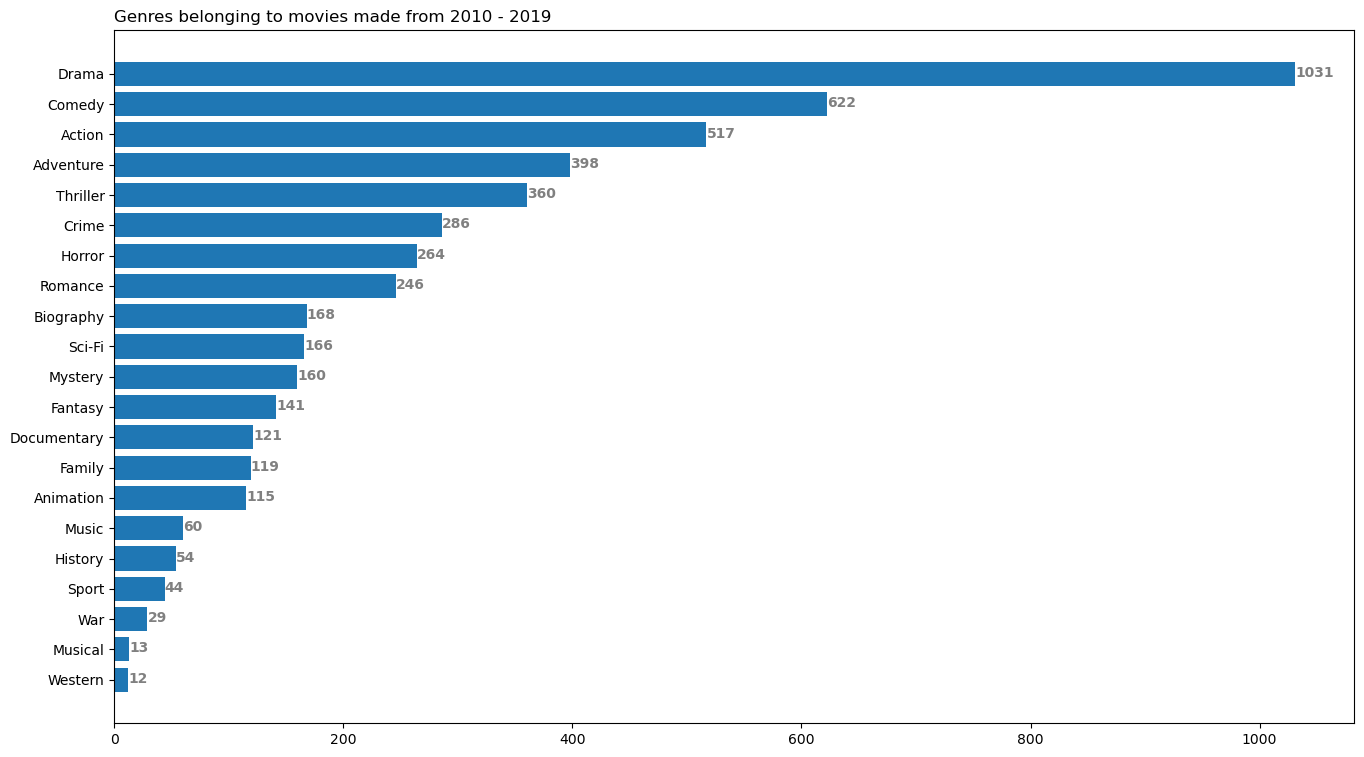

In [4]:
'''
1.1.4 Make a plot : 'Genres belonging to movies made from 2010 - 2019'
'''
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(genre_df.genres, genre_df.original_title)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

ax.set_title('Genres belonging to movies made from 2010 - 2019',
             loc ='left', )

In [5]:
'''
1.2.0 Comparing genres with average rating 
'''
'''
1.2.1
'''
genre_rating_df = (pd.DataFrame(genre_split_df.groupby('genres').averagerating.mean())).sort_values(
    by = 'averagerating', ascending = False ).reset_index()

genre_rating_df = genre_rating_df.merge(genre_df, on = 'genres', how = 'left').sort_values(
    by = 'averagerating', ascending = False)

genre_rating_df

,genres,averagerating,original_title
0,Documentary,7.179339,121
1,Biography,7.023214,168
2,History,6.794444,54
3,Sport,6.615909,44
4,War,6.613793,29
5,Western,6.566667,12
6,Animation,6.480870,115
7,Music,6.461667,60
8,Drama,6.449273,1031
9,Musical,6.415385,13


C:\Users\zhesh\AppData\Local\Temp\ipykernel_17712\2676842421.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha = 'right', rotation=45, fontsize = 15)


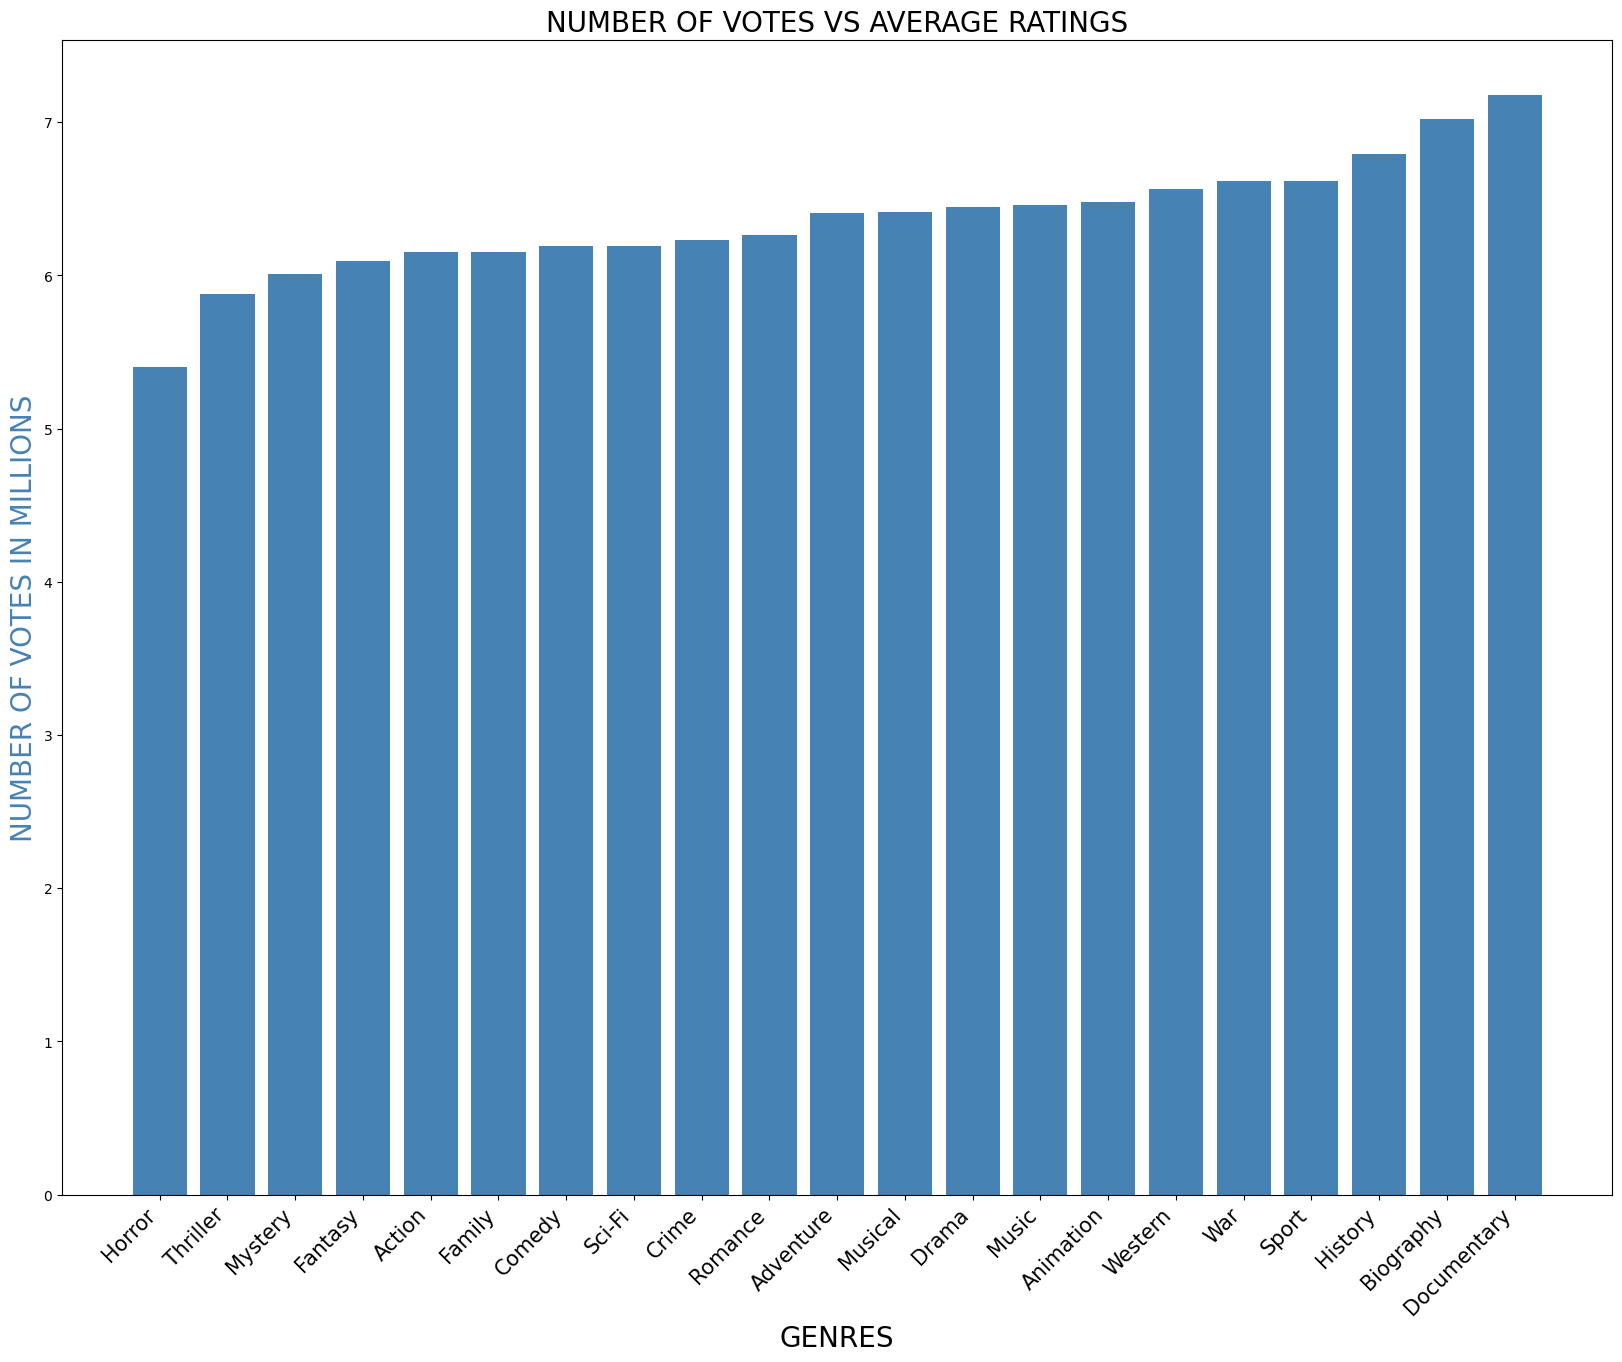

In [6]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots(figsize =(20,15))

#add first line to plot
ax.bar(genre_rating_df.genres, genre_rating_df.averagerating, color=col1)

#add x-axis label
ax.set_xlabel('GENRES', fontsize=20)

#add y-axis label
ax.set_ylabel('NUMBER OF VOTES IN MILLIONS', color=col1, fontsize=20)

ax.set_title('NUMBER OF VOTES VS AVERAGE RATINGS', fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(), ha = 'right', rotation=45, fontsize = 15)
ax.invert_xaxis()

In [7]:
'''
Compare the top 10 movie genre combinations from different years.
'''

'''
Top 10 movies 2019
'''

def top_ten_movies(year):
        
        df = master_cleaned_df[(master_cleaned_df['year'] == year)].sort_values(by = 'worldwide_gross', ascending = False)
        
        df = df.head(10)
        
        #df = df.groupby('genres').sum().sort_values(by = 'worldwide_gross', ascending = False).reset_index()
        
        #return df
        
        fig, ax = plt.subplots(figsize =(16, 9))
 
        # Horizontal Bar Plot
        ax.barh(df.original_title, df.worldwide_gross)
        
        ax.set_ylabel('Genre Combination', fontsize = 20)  
        ax.set_xlabel('Worldwide Gross, $ in Billions', fontsize = 20)

        ax.invert_yaxis()

        ax.set_title('df',
             loc ='left', )        
        
         

#movies_smaller_df  = (pd.DataFrame(movies_smaller_df.groupby('genres').title.nunique())).sort_values(by = 'worldwide_gross', ascending = False ).reset_index()

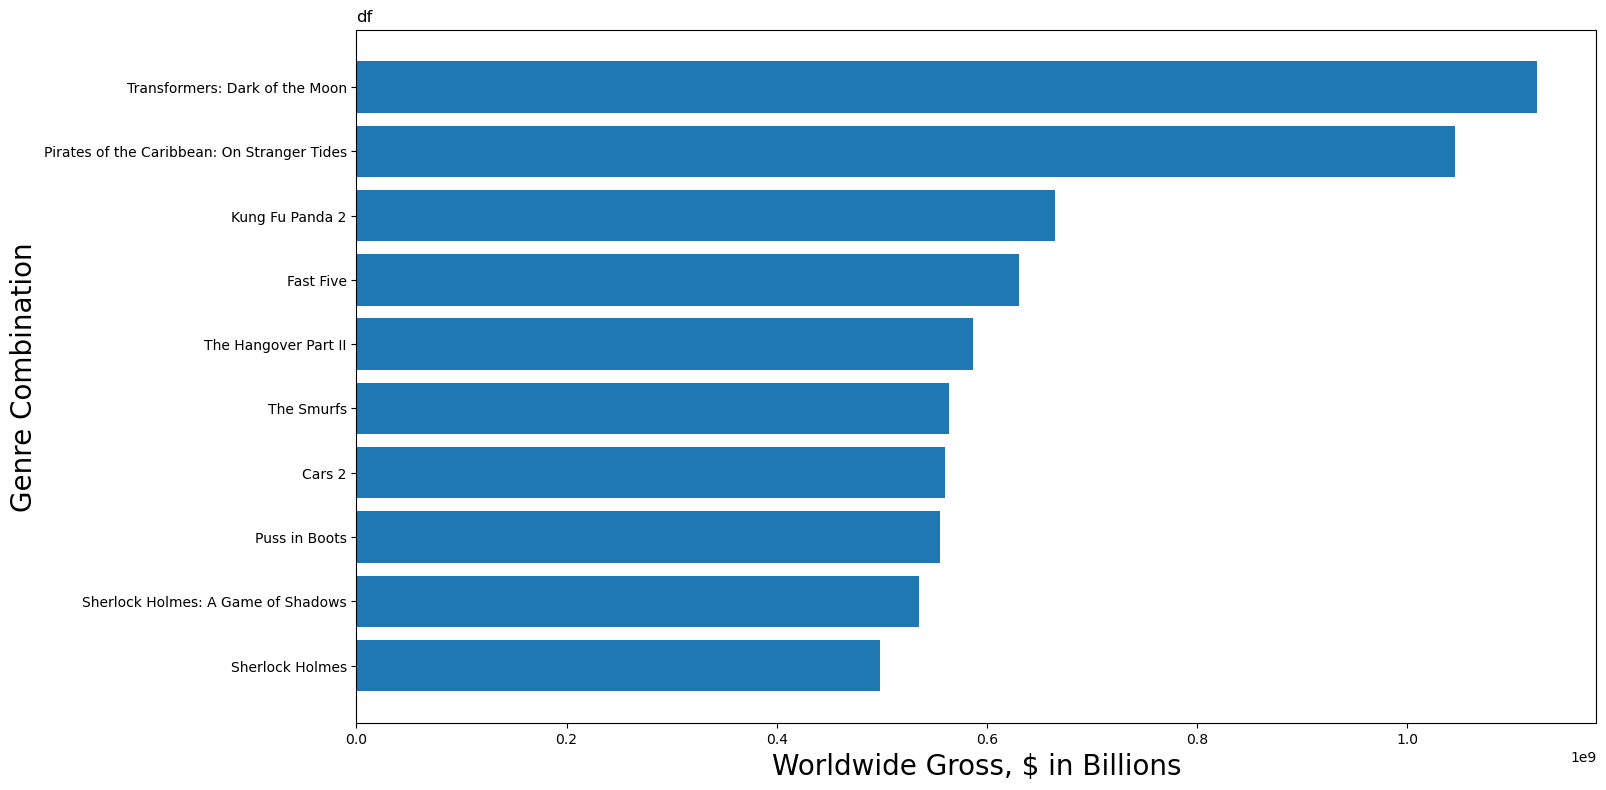

In [9]:
top_ten_movies(2011)

In [9]:
def top_ten_movies(year):
        
        df = master_cleaned_df[(master_cleaned_df['year'] == year)].sort_values(by = 'worldwide_gross', ascending = False)
        
        df = df.head(10)
        
        #df = df.groupby('genres').sum().sort_values(by = 'worldwide_gross', ascending = False).reset_index()
        
        return df
        
top_ten_movies(2010)

,original_title,year,genres,numvotes,averagerating,production_budget,domestic_gross,worldwide_gross
621,Frozen,2010,"Adventure,Drama,Sport",62311.0,6.2,150000000,400738009,1272469910
1491,Toy Story 3,2010,"Adventure,Animation,Comedy",682218.0,8.3,200000000,415004880,1068879522
458,Alice in Wonderland,2010,"Adventure,Family,Fantasy",358813.0,6.5,200000000,334191110,1025491110
1815,Inception,2010,"Action,Adventure,Sci-Fi",1841066.0,8.8,160000000,292576195,835524642
455,Shrek Forever After,2010,"Adventure,Animation,Comedy",167532.0,6.3,165000000,238736787,756244673
170,The Twilight Saga: Eclipse,2010,"Adventure,Drama,Fantasy",211733.0,5.0,68000000,300531751,706102828
42,Iron Man 2,2010,"Action,Adventure,Sci-Fi",657690.0,7.0,170000000,312433331,621156389
1571,Logan,2010,"Comedy,Drama,Family",252.0,6.2,127000000,226277068,615461394
384,Tangled,2010,"Adventure,Animation,Comedy",366366.0,7.8,260000000,200821936,586477240
100,Despicable Me,2010,"Animation,Comedy,Family",464511.0,7.7,69000000,251513985,543464573


In [11]:
'''
Top 10 Grossing Movies 2010 - 2019
'''

top_10_Gross = master_cleaned_df.sort_values(by = 'worldwide_gross', ascending = False)
        
top_10_Gross = top_10_Gross.head(10)
        
        #df = df.groupby('genres').sum().sort_values(by = 'worldwide_gross', ascending = False).reset_index()
        
        #return df
        
top_10_Gross

,original_title,year,genres,numvotes,averagerating,production_budget,domestic_gross,worldwide_gross
1048,Titanic,2012,Adventure,20,6.2,200000000,659363944,2208208395
2025,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",670926,8.5,300000000,678815482,2048134200
295,Jurassic World,2015,"Action,Adventure,Sci-Fi",539338,7.0,215000000,652270625,1648854864
1427,The Avengers,2012,"Action,Adventure,Sci-Fi",1183655,8.1,225000000,623279547,1517935897
1882,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",665594,7.3,330600000,459005868,1403013963
372,Black Panther,2018,"Action,Adventure,Sci-Fi",516148,7.3,200000000,700059566,1348258224
336,Jurassic World: Fallen Kingdom,2018,"Action,Adventure,Sci-Fi",219125,6.2,170000000,417719760,1305772799
621,Frozen,2010,"Adventure,Drama,Sport",62311,6.2,150000000,400738009,1272469910
1163,Beauty and the Beast,2017,"Family,Fantasy,Musical",238325,7.2,160000000,504014165,1259199706
1449,Incredibles 2,2018,"Action,Adventure,Animation",203510,7.7,200000000,608581744,1242520711


Text(0.0, 1.0, 'df')

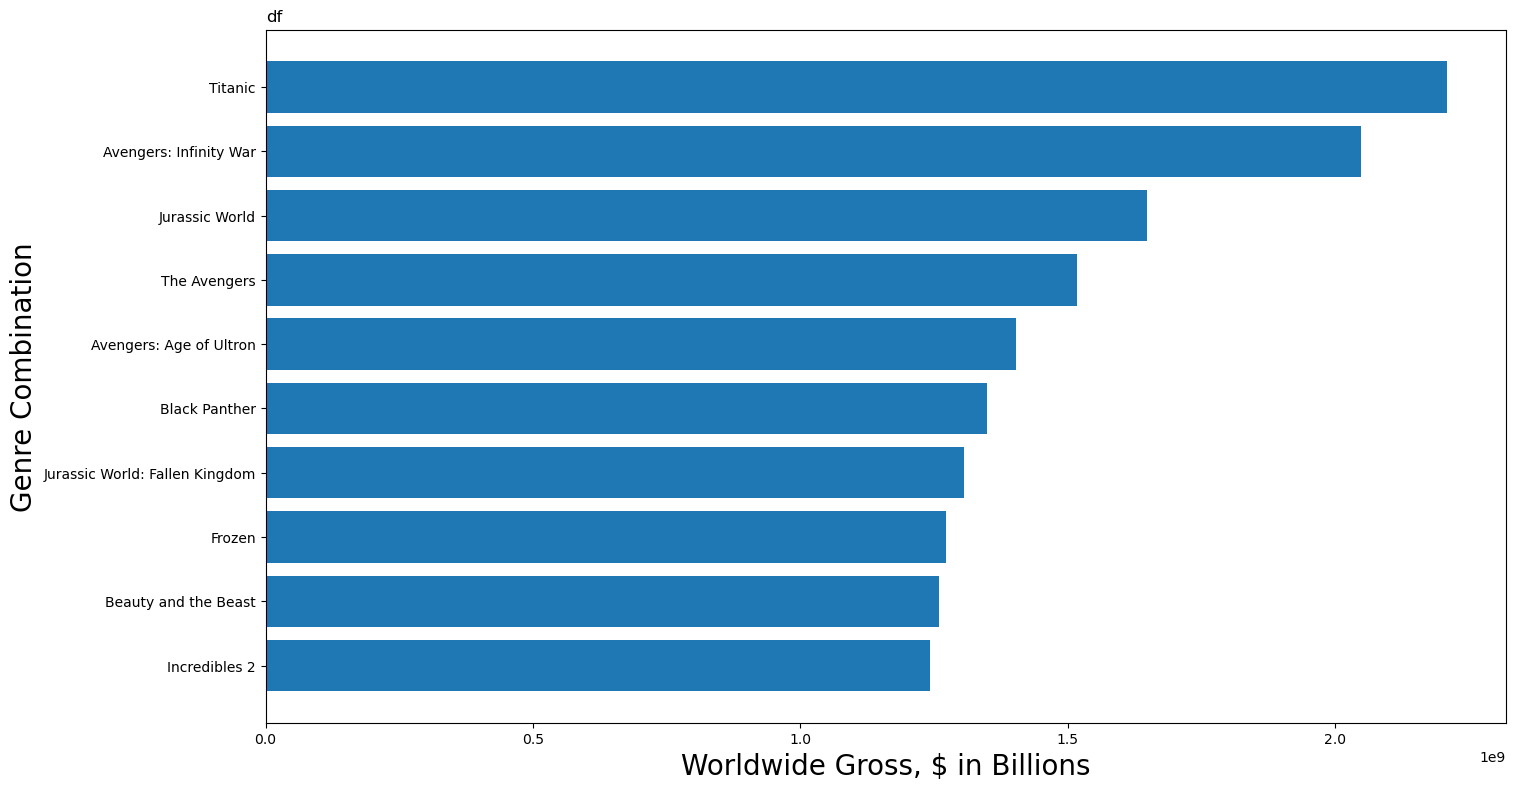

In [13]:
fig, ax = plt.subplots(figsize =(16, 9))
 
        # Horizontal Bar Plot
ax.barh(top_10_Gross.original_title, top_10_Gross.worldwide_gross)
        
ax.set_ylabel('Genre Combination', fontsize = 20)  
ax.set_xlabel('Worldwide Gross, $ in Billions', fontsize = 20)

ax.invert_yaxis()

ax.set_title('df', loc ='left', )   

In [11]:
movies_smaller_df

NameError: name 'movies_smaller_df' is not defined

In [ ]:
movies_smaller_df.title.nunique()

In [ ]:
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(movies_smaller_df.genres, movies_smaller_df.title.nunique())

ax.invert_yaxis()

ax.set_title('Genres belonging to movies made from 2010 - 2019',
             loc ='left', )

In [ ]:
#compare production budget vs profit